## Preparing data to be used in the web map

Downloading New Jersey boundary as GeoJSON

In [2]:
import cenpy as cen
import geopandas as gpd
%matplotlib inline

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [3]:
# Get the NJ state boundary from the TIGER API to plot with the data (see Census
# Jupyter Notebook for more exploration of this process)
con = cen.base.Connection('ACSDT5Y2017')
con.set_mapservice('tigerWMS_ACS2017')

#Get state boundary data
NJ_boundary = con.mapservice.query(layer=82, where='STATE=34',pkg='geopandas')

In [4]:
# The current way the crs is stored is a dictionary using latestwkid, which causes errors during export. I converted the crs 
# dictionary into one readable by geopandas, but it is not transforming the data in any way. 
NJ_boundary.crs = {'init': 'epsg:3857'}

In [5]:
# Save file as GeoJSON
NJ_boundary.to_file('NJ_boundary.json', driver='GeoJSON')

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [7]:
NJ = gpd.read_file('NJ_boundary.json')

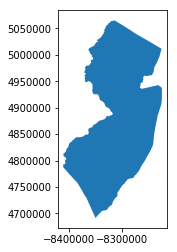

In [9]:
NJ.plot()